# Top 15 MF + BP GOs Upregulated DEGs Shared and Unique to CX and CB

### Import Statements

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

### BP Data

In [2]:
bp_cx_cb_data = pd.read_csv("bp_cx_cb_up_copy.csv")
print(bp_cx_cb_data.shape)
bp_cx_cb_data.head()

(199, 15)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up
0,GO:BP,heterocycle biosynthetic process,GO:0018130,4039,27543,8.900000e-18,8.900000e-18,777,214,0.275418,1.000000,1.000000,216,43,0.199074
1,GO:BP,regulation of cellular metabolic process,GO:0031323,6103,27543,9.790000e-18,9.790000e-18,777,286,0.368082,0.085061,0.085061,222,75,0.337838
2,GO:BP,aromatic compound biosynthetic process,GO:0019438,4050,27543,1.240000e-17,1.240000e-17,777,214,0.275418,1.000000,1.000000,216,43,0.199074
3,GO:BP,regulation of nucleobase-containing compound m...,GO:0019219,4088,27543,1.710000e-17,1.710000e-17,777,215,0.276705,1.000000,1.000000,216,50,0.231481
4,GO:BP,organic cyclic compound biosynthetic process,GO:1901362,4203,27543,4.470000e-17,4.470000e-17,777,218,0.280566,1.000000,1.000000,216,43,0.199074


In [3]:
bp_cx_cb_data = bp_cx_cb_data[(bp_cx_cb_data.term_size < 5000) & (bp_cx_cb_data.term_size > 8)]
bp_cx_cb_data.shape

(162, 15)

In [4]:
bp_unique_cx = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CX_Up < 0.05) 
                       & (bp_cx_cb_data.adjusted_p_value__CB_Up >= 0.05)].sort_values(by="adjusted_p_value__CX_Up")
bp_unique_cx["region"] = "CX"
bp_unique_cx["analysis"] = "unique_cx"
print(bp_unique_cx.shape)
bp_unique_cx.head()

(112, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up,region,analysis
0,GO:BP,heterocycle biosynthetic process,GO:0018130,4039,27543,8.900000e-18,8.900000e-18,777,214,0.275418,1.0,1.0,216,43,0.199074,CX,unique_cx
2,GO:BP,aromatic compound biosynthetic process,GO:0019438,4050,27543,1.240000e-17,1.240000e-17,777,214,0.275418,1.0,1.0,216,43,0.199074,CX,unique_cx
3,GO:BP,regulation of nucleobase-containing compound m...,GO:0019219,4088,27543,1.710000e-17,1.710000e-17,777,215,0.276705,1.0,1.0,216,50,0.231481,CX,unique_cx
4,GO:BP,organic cyclic compound biosynthetic process,GO:1901362,4203,27543,4.470000e-17,4.470000e-17,777,218,0.280566,1.0,1.0,216,43,0.199074,CX,unique_cx
5,GO:BP,nucleobase-containing compound biosynthetic pr...,GO:0034654,3971,27543,1.590000e-16,1.590000e-16,777,208,0.267696,1.0,1.0,216,43,0.199074,CX,unique_cx


In [5]:
bp_unique_cb = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CB_Up < 0.05) 
                       & (bp_cx_cb_data.adjusted_p_value__CX_Up >= 0.05)].sort_values(by="adjusted_p_value__CB_Up")
bp_unique_cb["region"] = "CB"
bp_unique_cb["analysis"] = "unique_cb"
print(bp_unique_cb.shape)
bp_unique_cb.head()

(33, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up,region,analysis
99,GO:BP,cellular component morphogenesis,GO:0032989,821,27543,1.00000,1.00000,175,12,0.068571,0.000632,0.000632,192,21,0.109375,CB,unique_cb
101,GO:BP,cell projection morphogenesis,GO:0048858,696,27543,1.00000,1.00000,741,34,0.045884,0.000902,0.000902,192,19,0.098958,CB,unique_cb
104,GO:BP,regulation of multicellular organismal process,GO:0051239,2854,27543,1.00000,1.00000,28,7,0.250000,0.001133,0.001133,134,34,0.253731,CB,unique_cb
106,GO:BP,cell morphogenesis,GO:0000902,1086,27543,0.36786,0.36786,773,52,0.067270,0.001153,0.001153,178,23,0.129213,CB,unique_cb
111,GO:BP,regulation of cell communication,GO:0010646,3453,27543,1.00000,1.00000,184,34,0.184783,0.001611,0.001611,193,49,0.253886,CB,unique_cb


In [46]:
bp_unique_cx[1:6].to_csv("bp_unique_cx_up.csv")
bp_unique_cb[1:6].to_csv("bp_unique_cb_up.csv")

In [6]:
bp_shared = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CX_Up < 0.05) 
                          & (bp_cx_cb_data.adjusted_p_value__CB_Up < 0.05)]
bp_shared["adjusted_p_value"] = bp_shared.adjusted_p_value__CX_Up + bp_shared.adjusted_p_value__CB_Up
bp_shared = bp_shared.sort_values(by="adjusted_p_value")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_49672/272532387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bp_shared["adjusted_p_value"] = bp_shared.adjusted_p_value__CX_Up + bp_shared.adjusted_p_value__CB_Up


In [107]:
bp_shared[1:16].to_csv("bp_shared_up.csv")

In [3]:
bp_master = pd.read_csv("bp_master_up.csv")
print(bp_master.shape)
bp_master.pop("Unnamed: 0")
bp_master.head()

(30, 13)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value,query_size__CX_Up,intersection_size__CX_Up,gene_ratio,region,analysis
0,GO:BP,system development,GO:0048731,4533,27543,2.260000e-05,2.260000e-05,773,188,0.243208,1,shared
1,GO:BP,generation of neurons,GO:0048699,1587,27543,1.930000e-07,1.930000e-07,773,91,0.117723,1,shared
2,GO:BP,neurogenesis,GO:0022008,1822,27543,1.090000e-06,1.090000e-06,773,98,0.126779,1,shared
3,GO:BP,neuron differentiation,GO:0030182,1514,27543,1.080000e-06,1.080000e-06,773,86,0.111255,1,shared
4,GO:BP,regulation of cellular component organization,GO:0051128,2398,27543,3.298970e-04,3.298970e-04,731,106,0.145007,1,shared


/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_56641/4241935090.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


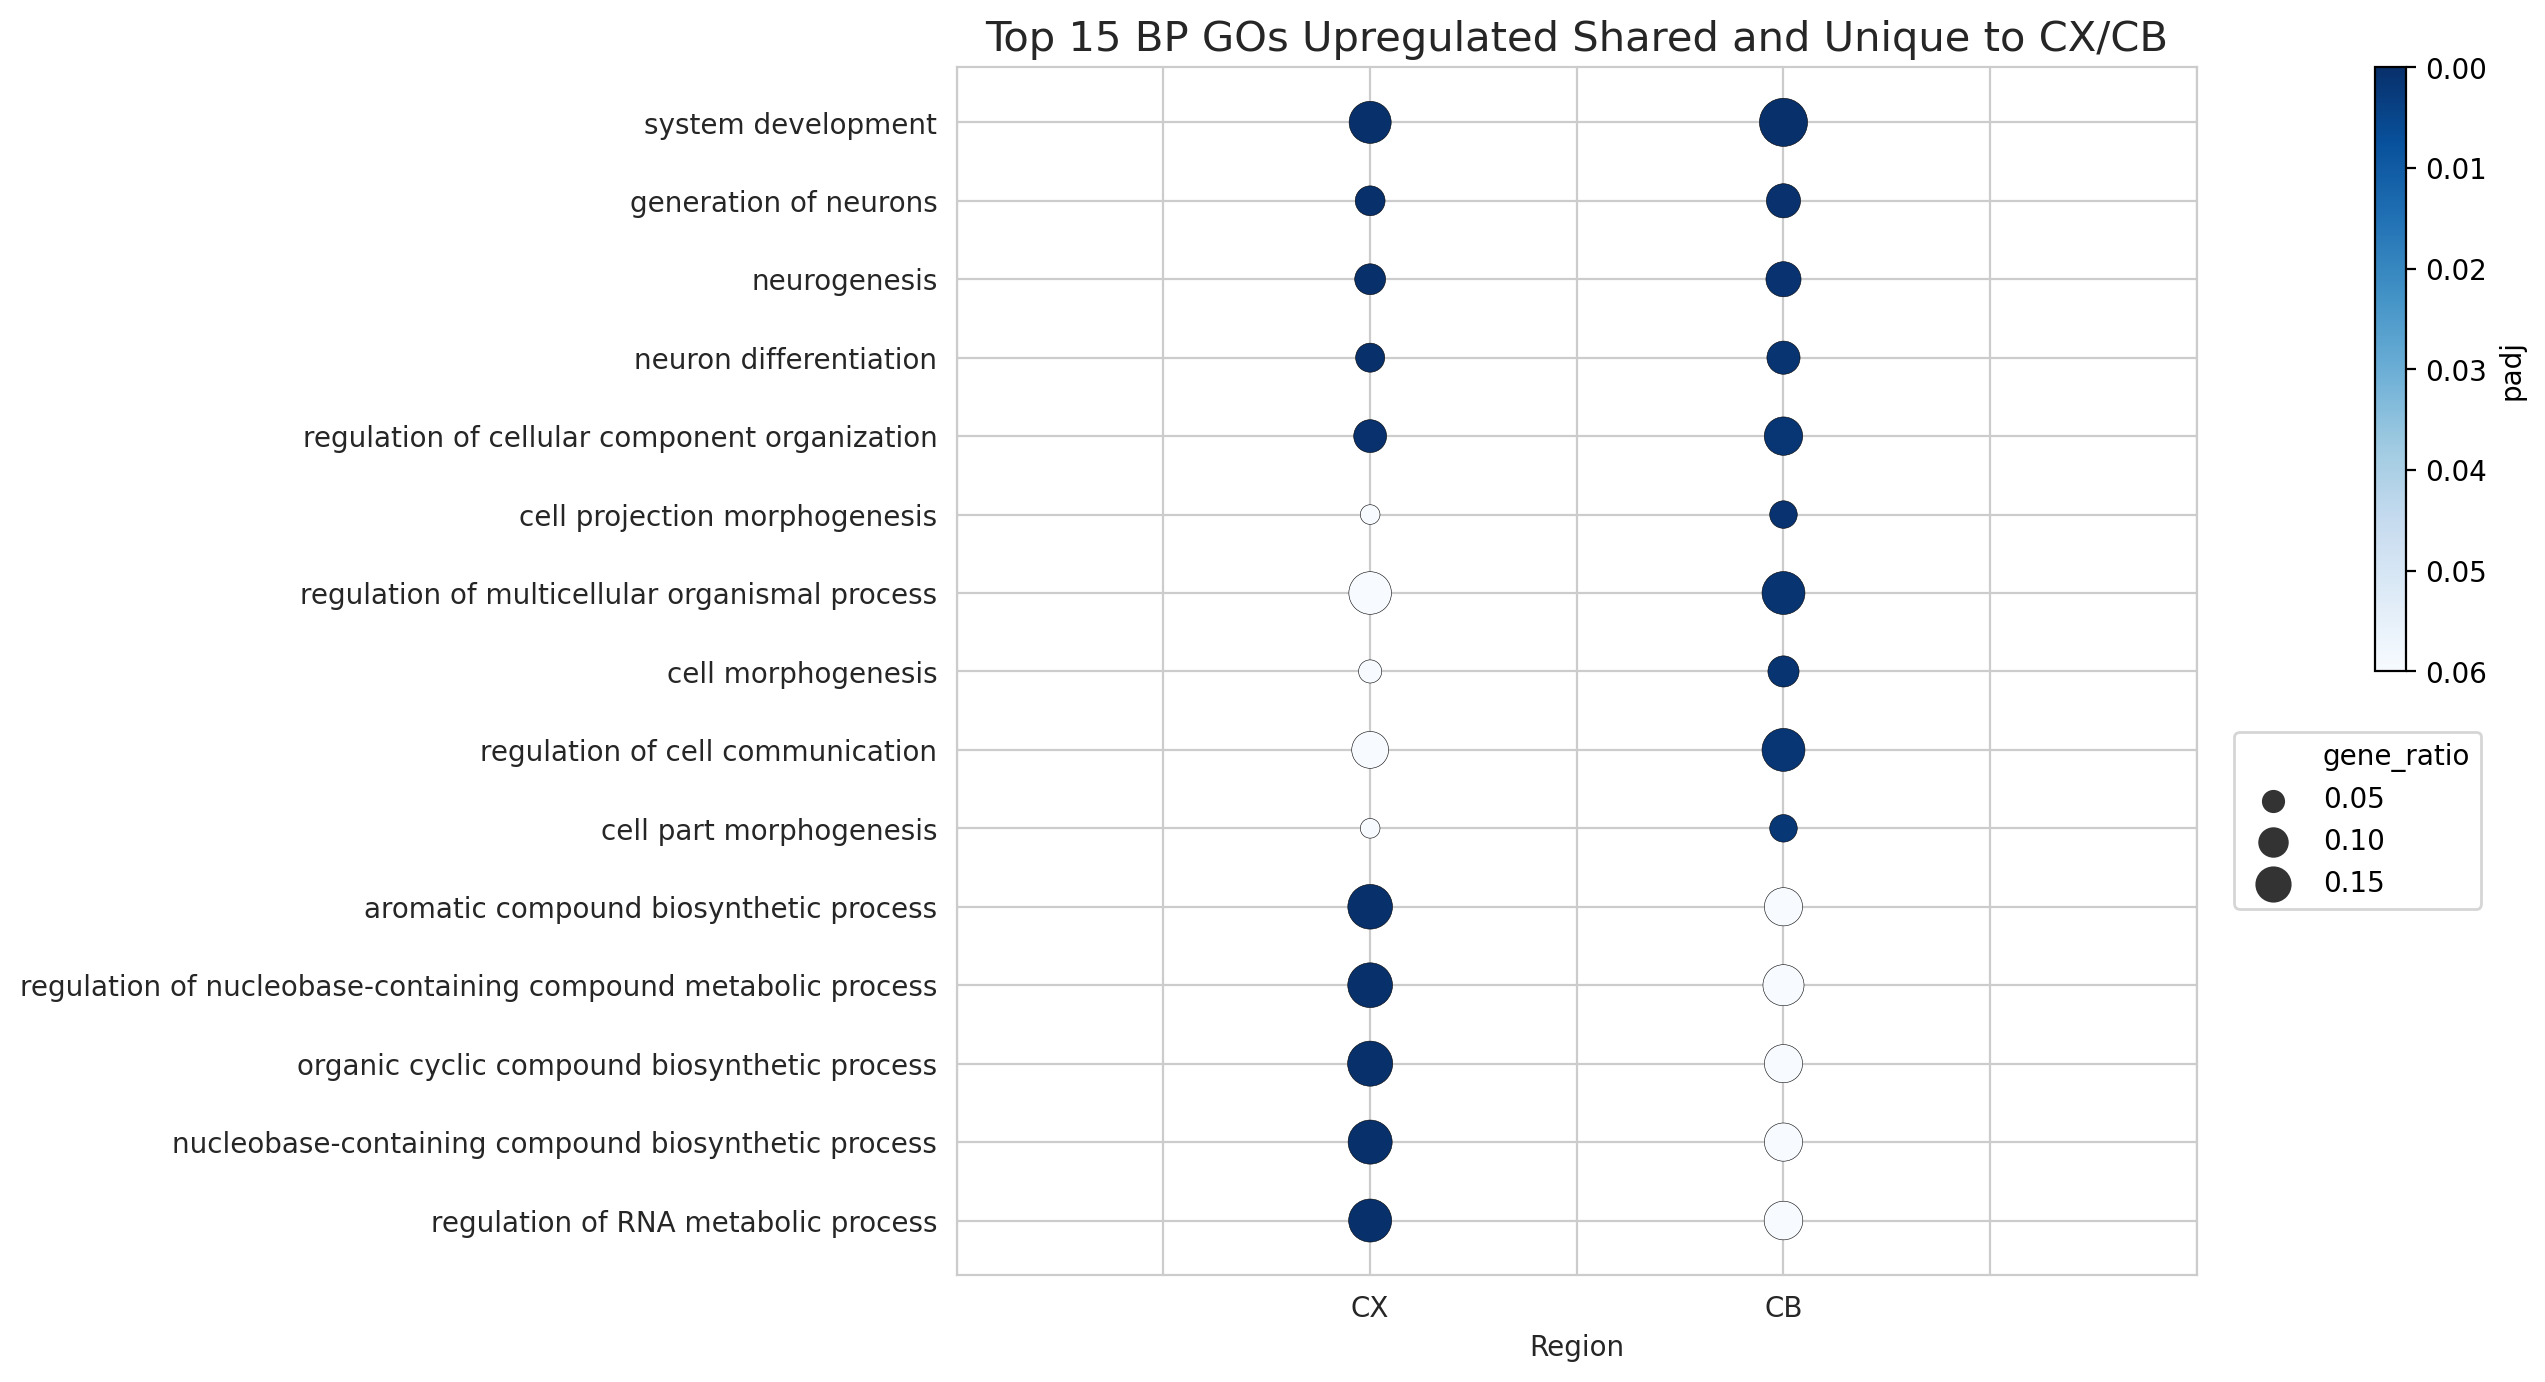

In [24]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=bp_master, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300),
                         style="analysis",
                         markers=["o", "o", "o"], 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 BP GOs Upregulated Shared and Unique to CX/CB", size=15)

plt.savefig('Top_15_BP_GOs_Up_Shared_and_Unique.pdf', bbox_inches='tight')

plt.show(ax)

### MF Data

In [19]:
mf_cx_cb_data = pd.read_csv("mf_cx_cb_up_copy.csv")
print(mf_cx_cb_data.shape)
mf_cx_cb_data.head()

(62, 15)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up
0,GO:MF,binding,GO:0005488,16232,25412,6.070000e-14,6.070000e-14,761,590,0.775296,1.000000,1.000000,214,156,0.728972
1,GO:MF,protein binding,GO:0005515,10481,25412,2.070000e-13,2.070000e-13,744,415,0.557796,0.002953,0.002953,222,125,0.563063
2,GO:MF,catalytic activity,GO:0003824,5730,25412,4.930000e-12,4.930000e-12,756,262,0.346561,1.000000,1.000000,30,14,0.466667
3,GO:MF,DNA binding,GO:0003677,2406,25412,2.760000e-11,2.760000e-11,777,140,0.180180,1.000000,1.000000,222,35,0.157658
4,GO:MF,ion binding,GO:0043167,5914,25412,6.890000e-11,6.890000e-11,756,264,0.349206,1.000000,1.000000,214,66,0.308411


In [20]:
mf_cx_cb_data = mf_cx_cb_data[(mf_cx_cb_data.term_size < 5000) & (mf_cx_cb_data.term_size > 8)]
mf_cx_cb_data.shape

(48, 15)

In [21]:
mf_unique_cx = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CX_Up < 0.05) 
                       & (mf_cx_cb_data.adjusted_p_value__CB_Up >= 0.05)].sort_values(by="adjusted_p_value__CX_Up")
mf_unique_cx["region"] = "CX"
mf_unique_cx["analysis"] = "unique_cx"
print(mf_unique_cx.shape)
mf_unique_cx.head()

(46, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up,region,analysis
3,GO:MF,DNA binding,GO:0003677,2406,25412,2.760000e-11,2.760000e-11,777,140,0.180180,1.0,1.0,222,35,0.157658,CX,unique_cx
5,GO:MF,sequence-specific DNA binding,GO:0043565,1607,25412,3.670000e-10,3.670000e-10,777,103,0.132561,1.0,1.0,222,25,0.112613,CX,unique_cx
6,GO:MF,sequence-specific double-stranded DNA binding,GO:1990837,1502,25412,1.570000e-08,1.570000e-08,777,94,0.120978,1.0,1.0,222,24,0.108108,CX,unique_cx
8,GO:MF,double-stranded DNA binding,GO:0003690,1601,25412,4.390000e-08,4.390000e-08,777,97,0.124839,1.0,1.0,222,25,0.112613,CX,unique_cx
9,GO:MF,nucleotide binding,GO:0000166,2188,25412,5.430000e-08,5.430000e-08,675,109,0.161481,1.0,1.0,38,5,0.131579,CX,unique_cx


In [22]:
mf_unique_cb = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CB_Up < 0.05) 
                       & (mf_cx_cb_data.adjusted_p_value__CX_Up >= 0.05)].sort_values(by="adjusted_p_value__CB_Up")
mf_unique_cb["region"] = "CB"
mf_unique_cb["analysis"] = "unique_cb"
print(mf_unique_cb.shape)
mf_unique_cb.head()

(2, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up,region,analysis
49,GO:MF,metal ion transmembrane transporter activity,GO:0046873,417,25412,1.000000,1.000000,22,1,0.045455,0.013511,0.013511,220,14,0.063636,CB,unique_cb
59,GO:MF,phosphoprotein binding,GO:0051219,105,25412,0.130002,0.130002,210,6,0.028571,0.037758,0.037758,3,2,0.666667,CB,unique_cb


In [25]:
mf_unique_cx[1:6].to_csv("mf_unique_cx_up.csv")
mf_unique_cb[1:6].to_csv("mf_unique_cb_up.csv")

In [21]:
mf_shared = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CX_Up < 0.05) 
                          & (mf_cx_cb_data.adjusted_p_value__CB_Up < 0.05)]
mf_shared["adjusted_p_value"] = mf_shared.adjusted_p_value__CX_Up + mf_shared.adjusted_p_value__CB_Up
mf_shared = mf_shared.sort_values(by="adjusted_p_value")

In [31]:
mf_shared.to_csv("mf_shared_up.csv")

In [16]:
mf_master = pd.read_csv("mf_master_up.csv")
print(mf_master.shape)
mf_master.pop("Unnamed: 0")
mf_master.head()

(12, 13)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value,query_size__CX_Up,intersection_size__CX_Up,gene_ratio,region,analysis
0,GO:MF,phosphoprotein binding,GO:0051219,105,25412,1.300019e-01,1.300019e-01,210,6,0.028571,1,unique_cb
1,GO:MF,phosphoprotein binding,GO:0051219,105,25412,3.775751e-02,3.775751e-02,3,2,0.666667,2,unique_cb
2,GO:MF,sequence-specific DNA binding,GO:0043565,1607,25412,3.670000e-10,3.670000e-10,777,103,0.132561,1,unique_cx
3,GO:MF,sequence-specific double-stranded DNA binding,GO:1990837,1502,25412,1.570000e-08,1.570000e-08,777,94,0.120978,1,unique_cx
4,GO:MF,double-stranded DNA binding,GO:0003690,1601,25412,4.390000e-08,4.390000e-08,777,97,0.124839,1,unique_cx


/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_56641/610422875.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


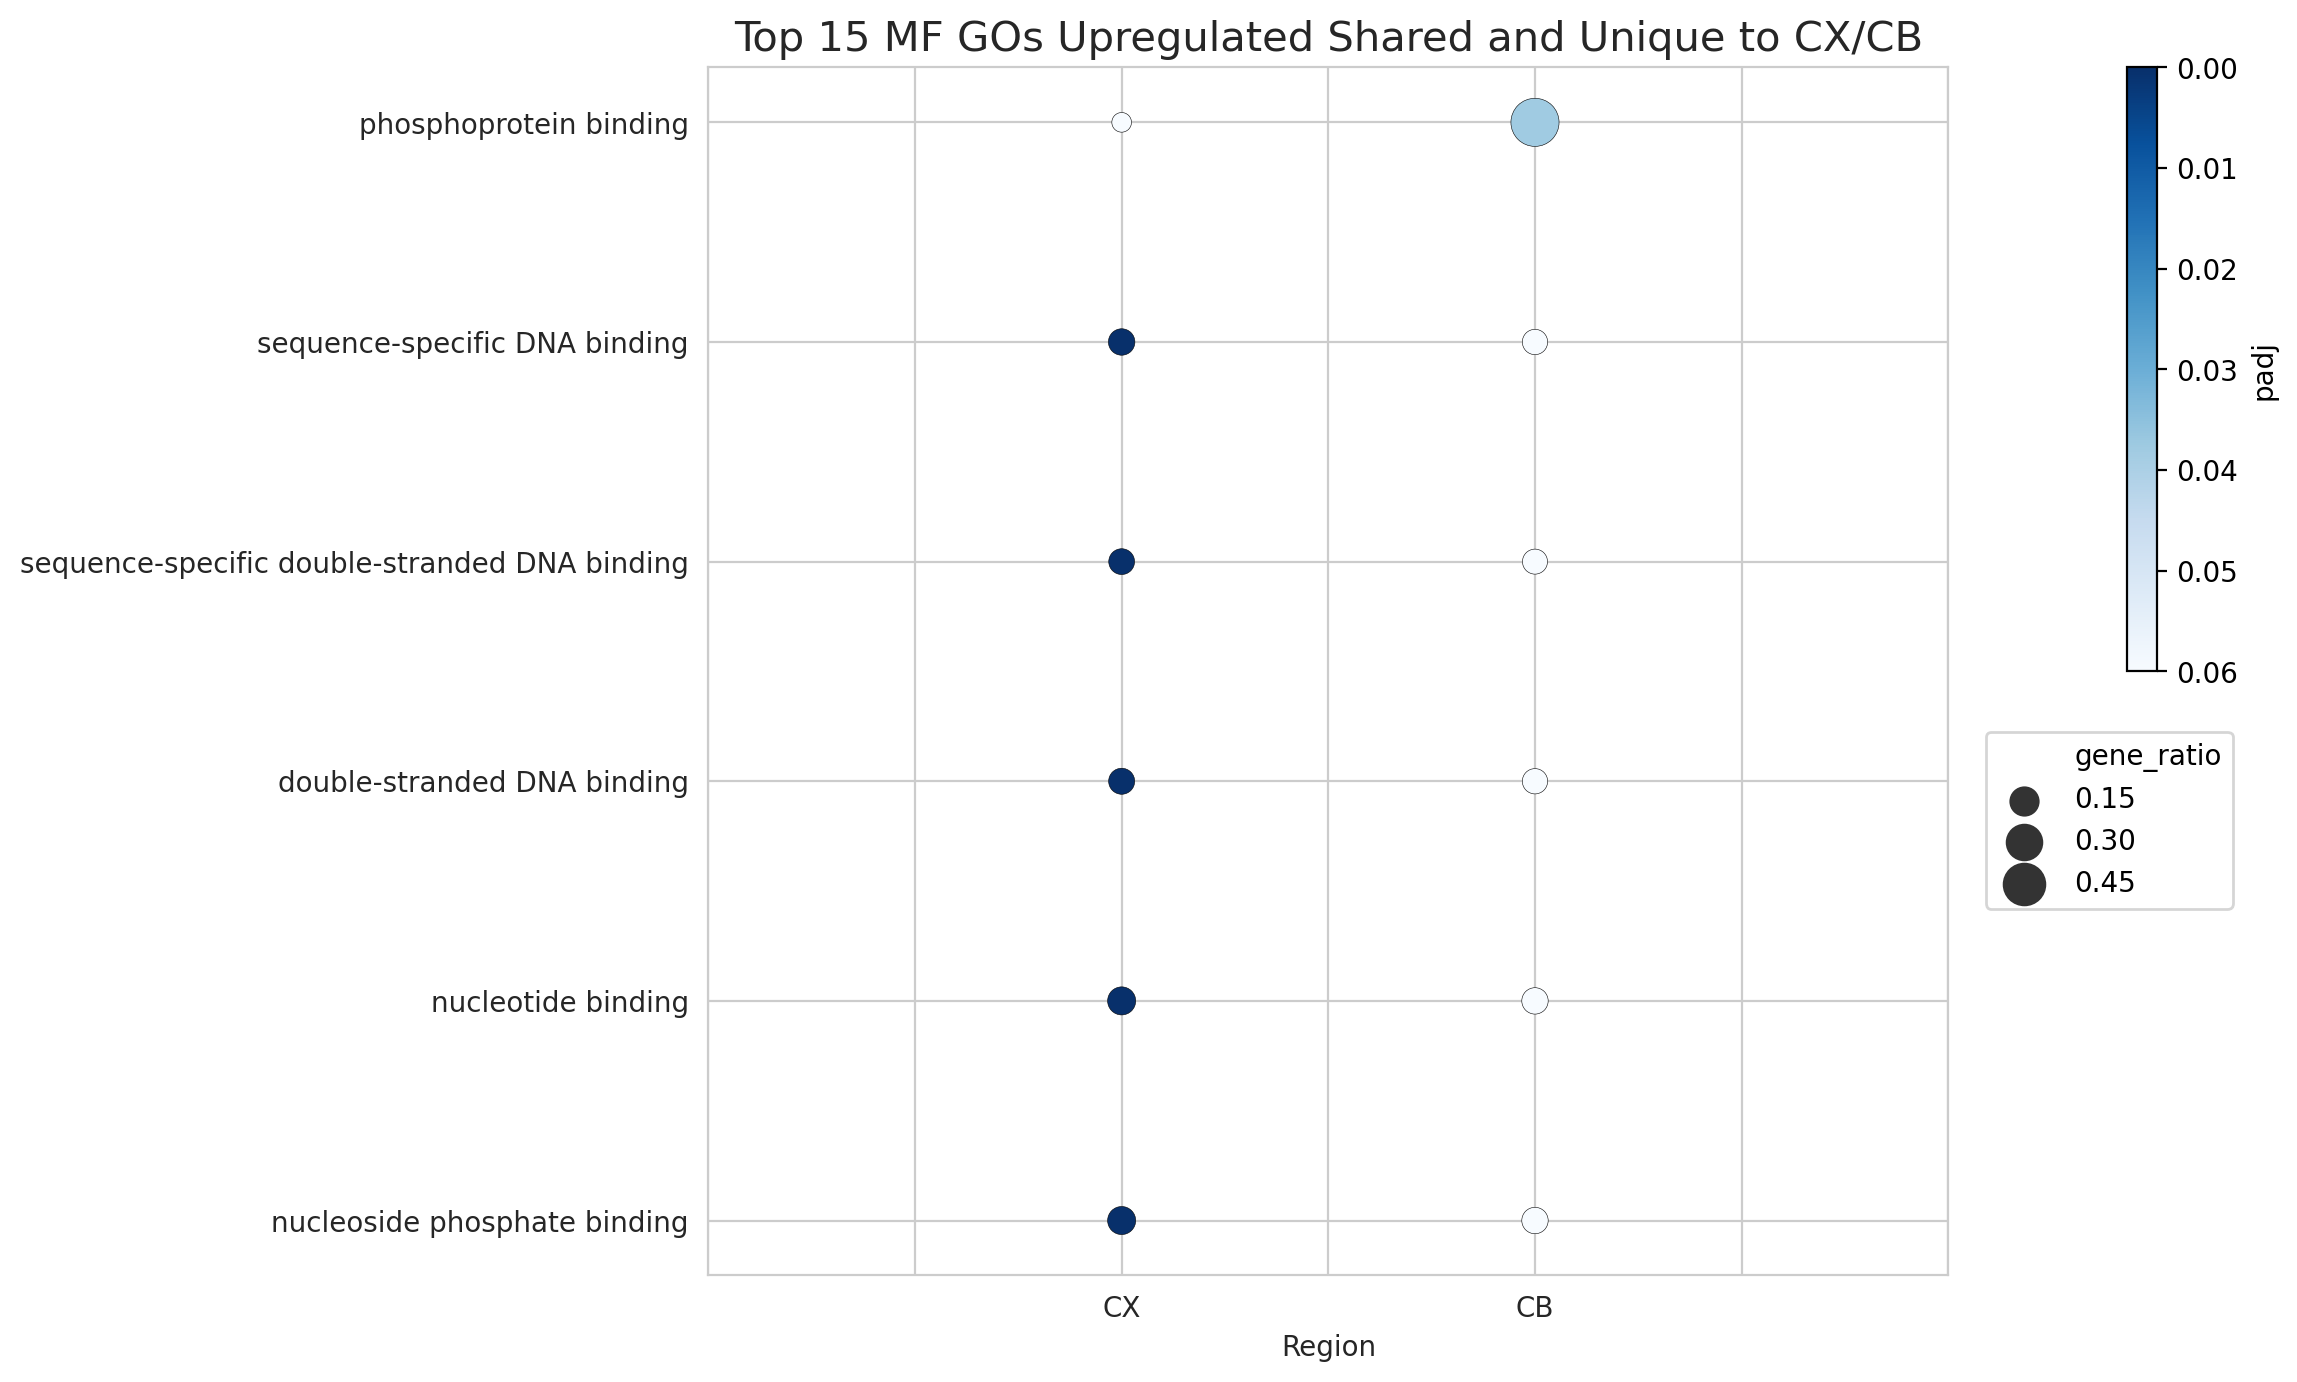

In [25]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=mf_master, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300),
                         style="analysis",
                         markers=["o", "o"], 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 MF GOs Upregulated Shared and Unique to CX/CB", size=15)

plt.savefig('Top_15_MF_GOs_Up_Shared_and_Unique.pdf', bbox_inches='tight')

plt.show(ax)

## Top 15 Unique CX

### BP

In [30]:
bp_unique_cx = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CX_Up < 0.05) 
                       & (bp_cx_cb_data.adjusted_p_value__CB_Up >= 0.05)].sort_values(by="adjusted_p_value__CX_Up")
bp_unique_cx["region"] = "CX"
bp_unique_cx["analysis"] = "unique_cx"
print(bp_unique_cx.shape)
bp_unique_cx.tail()

(112, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up,region,analysis
192,GO:BP,protein deacetylation,GO:0006476,123,27543,0.044499,0.044499,602,12,0.019934,1.000000,1.000000,-1,-1,1.00000,CX,unique_cx
194,GO:BP,fatty acid catabolic process,GO:0009062,110,27543,0.047081,0.047081,569,11,0.019332,1.000000,1.000000,-1,-1,1.00000,CX,unique_cx
195,GO:BP,regulation of establishment of protein localiz...,GO:0070202,12,27543,0.047131,0.047131,390,4,0.010256,1.000000,1.000000,-1,-1,1.00000,CX,unique_cx
197,GO:BP,protein modification process,GO:0036211,3707,27543,0.048904,0.048904,730,138,0.189041,0.145816,0.145816,222,51,0.22973,CX,unique_cx
198,GO:BP,cellular protein modification process,GO:0006464,3707,27543,0.048904,0.048904,730,138,0.189041,0.145816,0.145816,222,51,0.22973,CX,unique_cx


In [31]:
bp_unique_cx[1:16].to_csv("bp_unique_cx_up_long.csv")

In [19]:
bp_unique_cx_long = pd.read_csv("bp_unique_cx_up_long.csv")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_56641/1561731805.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


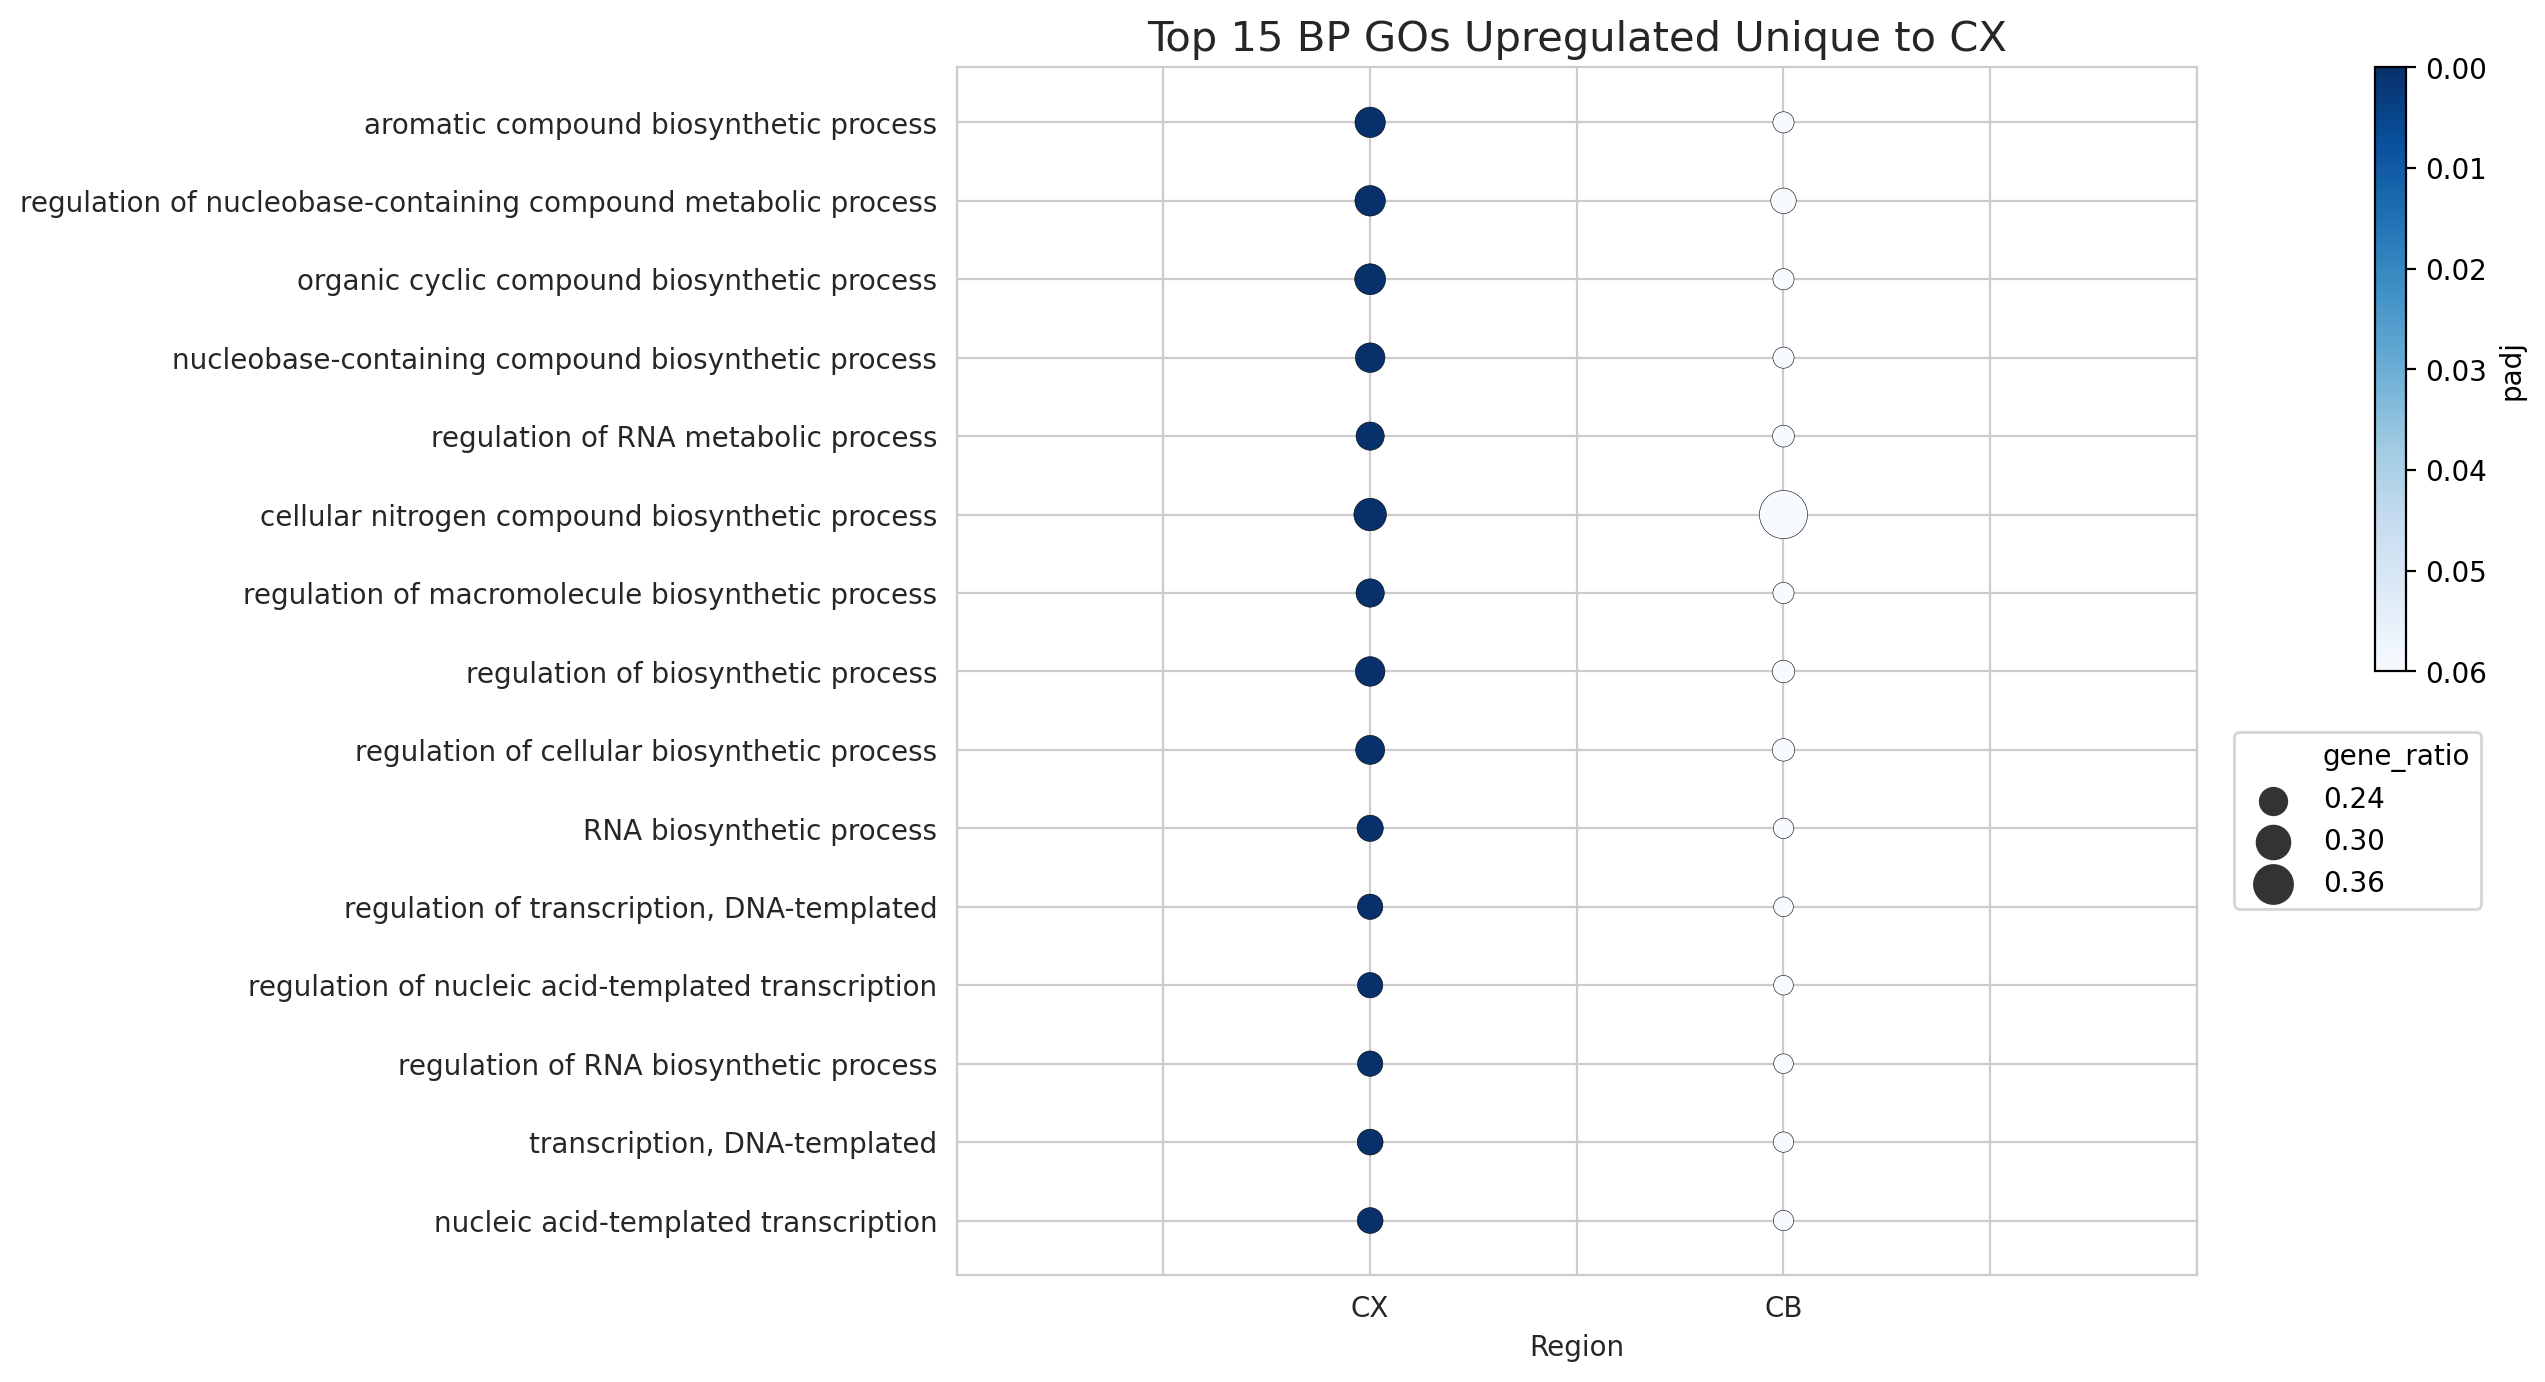

In [26]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=bp_unique_cx_long, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300), 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)

sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 BP GOs Upregulated Unique to CX", size=15)

plt.savefig('Top_15_BP_GOs_Up_Unique_CX_CB.pdf', bbox_inches='tight')

plt.show(ax)

### MF

In [77]:
mf_unique_cx = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CX_Up < 0.05) 
                       & (mf_cx_cb_data.adjusted_p_value__CB_Up >= 0.05)].sort_values(by="adjusted_p_value__CX_Up")
mf_unique_cx["region"] = "CX"
mf_unique_cx["analysis"] = "unique_cx"
print(mf_unique_cx.shape)
mf_unique_cx.head()

(2, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up,region,analysis
49,GO:MF,metal ion transmembrane transporter activity,GO:0046873,417,25412,1.000000,1.000000,22,1,0.045455,0.013511,0.013511,220,14,0.063636,CB,unique_cb
59,GO:MF,phosphoprotein binding,GO:0051219,105,25412,0.130002,0.130002,210,6,0.028571,0.037758,0.037758,3,2,0.666667,CB,unique_cb


In [79]:
mf_unique_cx[1:16].to_csv("mf_unique_cx_up_long.csv")

In [22]:
mf_unique_cx_long = pd.read_csv("mf_unique_cx_up_long.csv")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_56641/1293591057.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


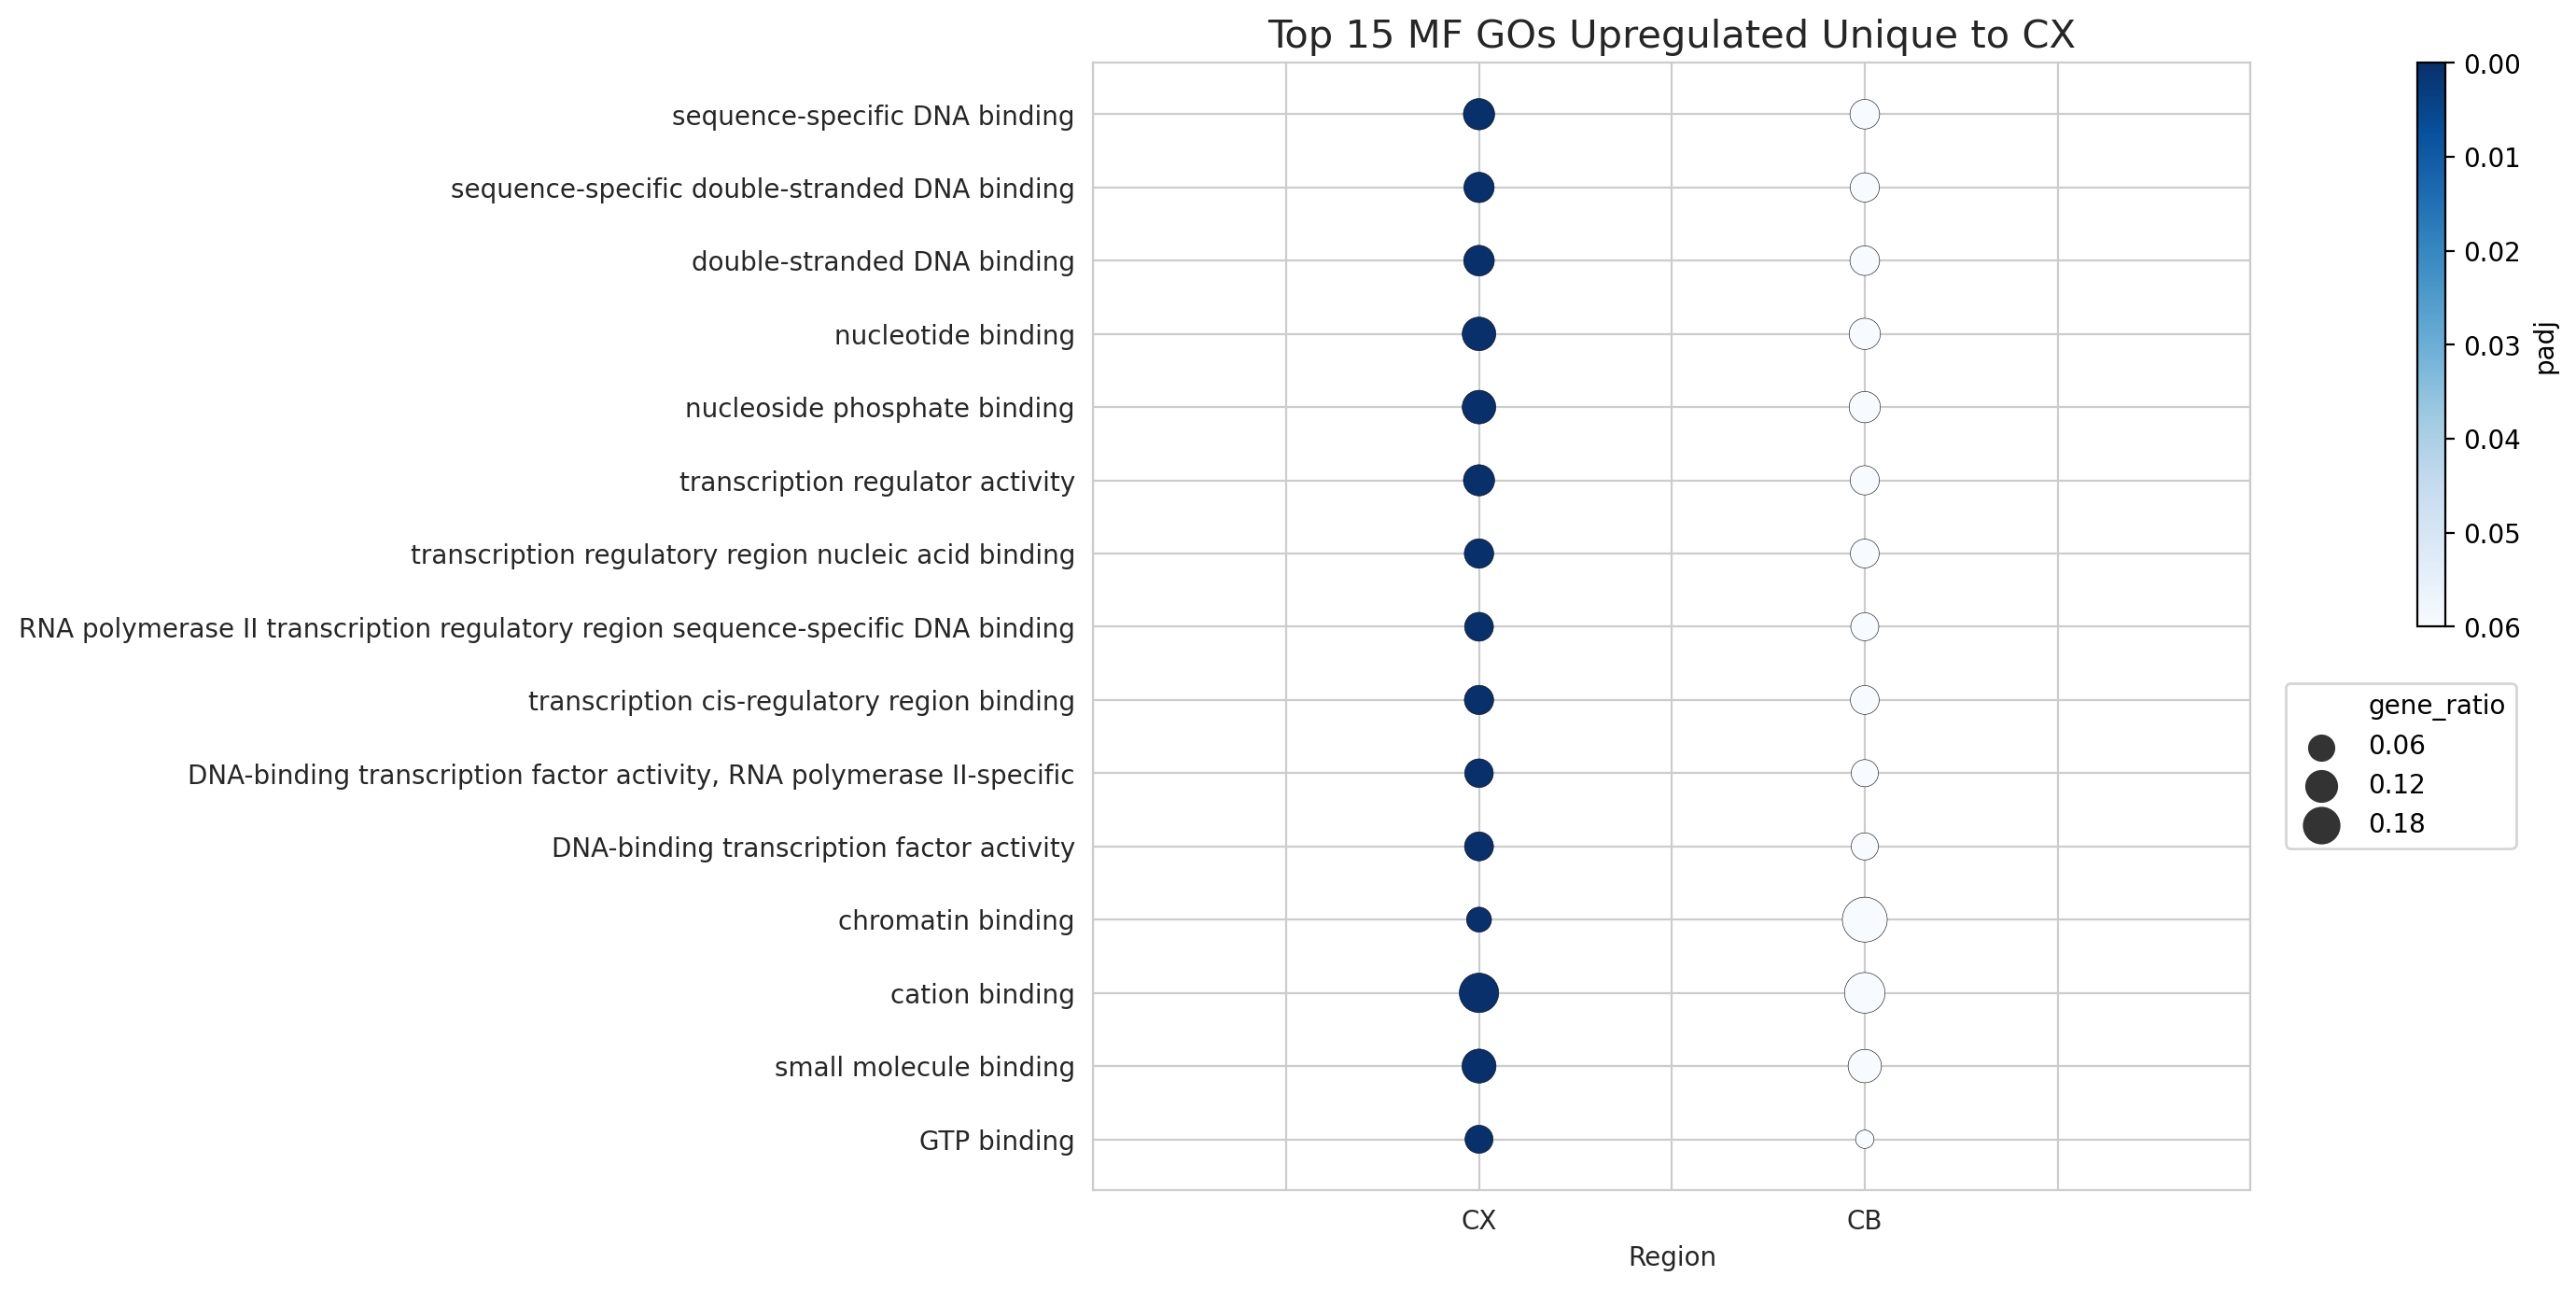

In [27]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=mf_unique_cx_long, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300), 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    

sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 MF GOs Upregulated Unique to CX", size=15)

plt.savefig("Top_15_MF_GOs_Up_Unique_CX_CB.pdf", bbox_inches='tight')

plt.show(ax)

## Top 15 Unique CB

### BP

In [40]:
bp_unique_cb = bp_cx_cb_data[(bp_cx_cb_data.adjusted_p_value__CB_Up < 0.05) 
                       & (bp_cx_cb_data.adjusted_p_value__CX_Up >= 0.05)].sort_values(by="adjusted_p_value__CB_Up")
bp_unique_cb["region"] = "CB"
bp_unique_cb["analysis"] = "unique_cb"
print(bp_unique_cb.shape)
bp_unique_cb.head()

(33, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up,region,analysis
99,GO:BP,cellular component morphogenesis,GO:0032989,821,27543,1.00000,1.00000,175,12,0.068571,0.000632,0.000632,192,21,0.109375,CB,unique_cb
101,GO:BP,cell projection morphogenesis,GO:0048858,696,27543,1.00000,1.00000,741,34,0.045884,0.000902,0.000902,192,19,0.098958,CB,unique_cb
104,GO:BP,regulation of multicellular organismal process,GO:0051239,2854,27543,1.00000,1.00000,28,7,0.250000,0.001133,0.001133,134,34,0.253731,CB,unique_cb
106,GO:BP,cell morphogenesis,GO:0000902,1086,27543,0.36786,0.36786,773,52,0.067270,0.001153,0.001153,178,23,0.129213,CB,unique_cb
111,GO:BP,regulation of cell communication,GO:0010646,3453,27543,1.00000,1.00000,184,34,0.184783,0.001611,0.001611,193,49,0.253886,CB,unique_cb


In [91]:
# bp_unique_cb[1:16].to_csv("bp_unique_cb_up_long.csv")

In [2]:
bp_unique_cb_long = pd.read_csv("bp_unique_cb_up_long.csv")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_56820/455042104.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


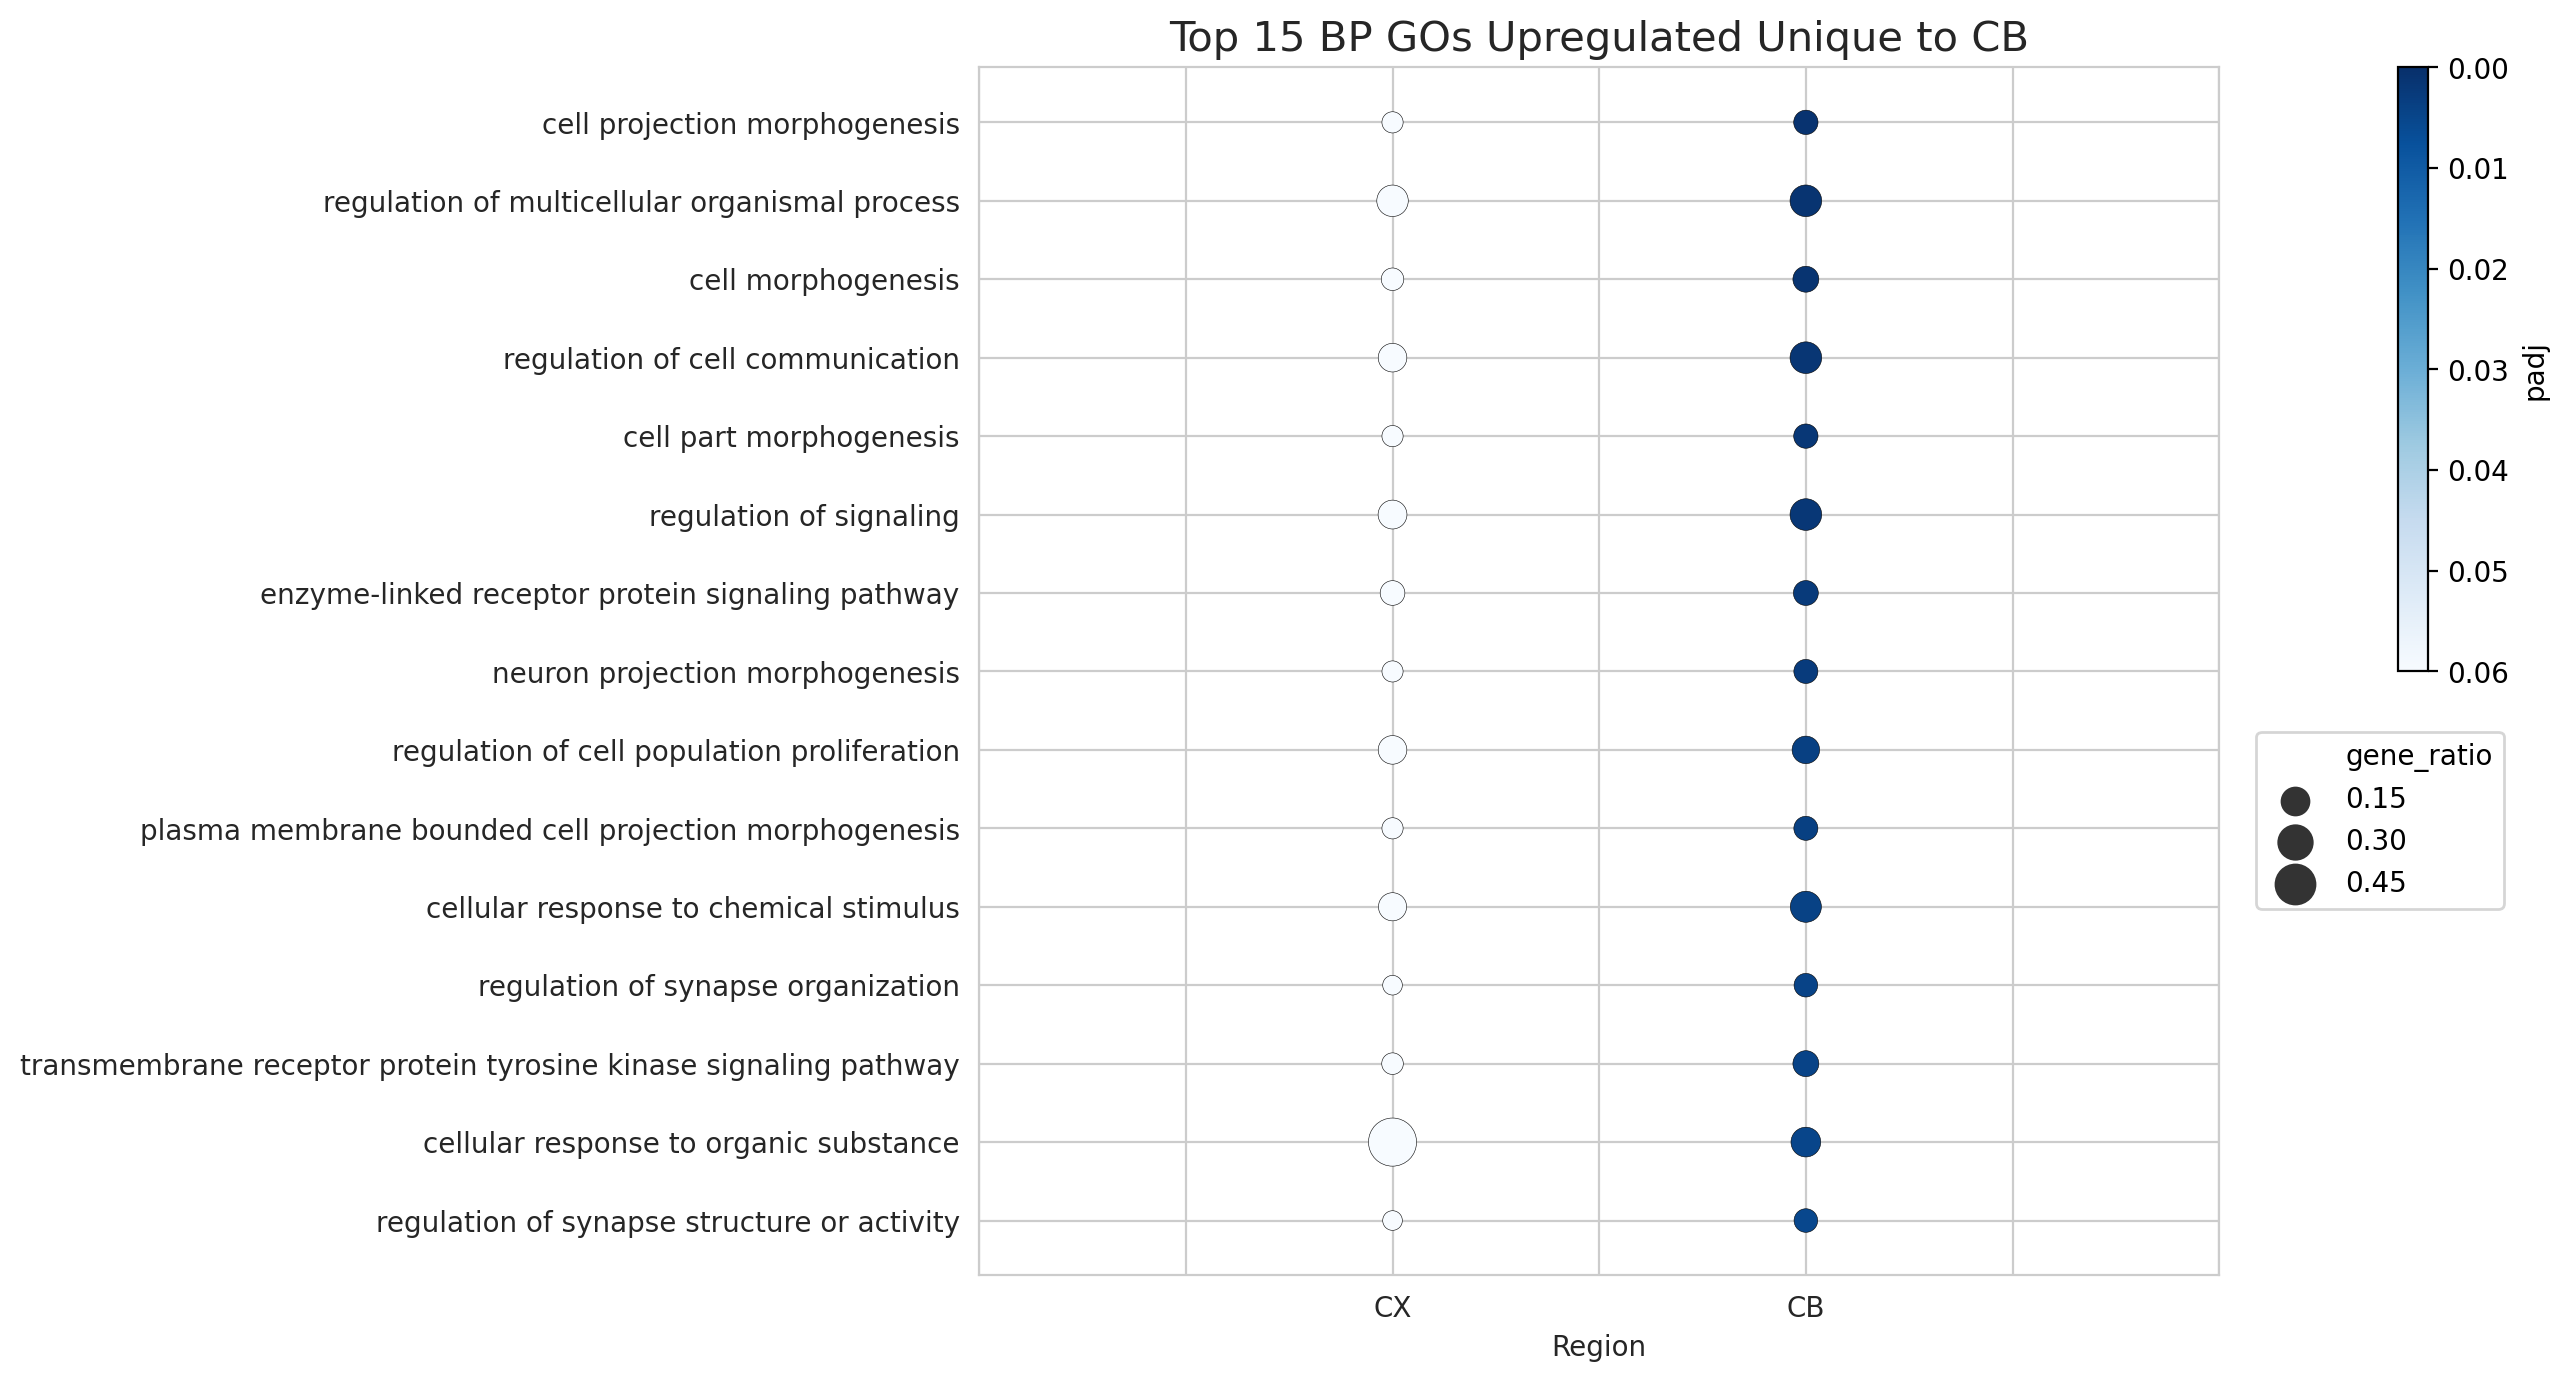

In [3]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=bp_unique_cb_long, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300), 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[6:10], l[6:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 BP GOs Upregulated Unique to CB", size=15)

plt.savefig("Top_15_BP_GOs_Up_Unique_CB_CX.pdf", bbox_inches='tight')

plt.show(ax)

### MF

In [98]:
mf_unique_cb = mf_cx_cb_data[(mf_cx_cb_data.adjusted_p_value__CB_Up < 0.05) 
                       & (mf_cx_cb_data.adjusted_p_value__CX_Up >= 0.05)].sort_values(by="adjusted_p_value__CB_Up")
mf_unique_cb["region"] = "CB"
mf_unique_cb["analysis"] = "unique_cb"
print(mf_unique_cb.shape)
mf_unique_cb.head()

(2, 17)


,source,term_name,term_id,term_size,effective_domain_size,p_adj_color,adjusted_p_value__CX_Up,query_size__CX_Up,intersection_size__CX_Up,gene_ratio_CX_Up,p_adj_color.1,adjusted_p_value__CB_Up,query_size__CB_Up,intersection_size__CB_Up,gene_ratio_CB_Up,region,analysis
49,GO:MF,metal ion transmembrane transporter activity,GO:0046873,417,25412,1.000000,1.000000,22,1,0.045455,0.013511,0.013511,220,14,0.063636,CB,unique_cb
59,GO:MF,phosphoprotein binding,GO:0051219,105,25412,0.130002,0.130002,210,6,0.028571,0.037758,0.037758,3,2,0.666667,CB,unique_cb


In [99]:
# mf_unique_cb[1:16].to_csv("mf_unique_cb_up_long.csv")

In [31]:
mf_unique_cb_long = pd.read_csv("mf_unique_cb_up_long.csv")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_56641/3731457680.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


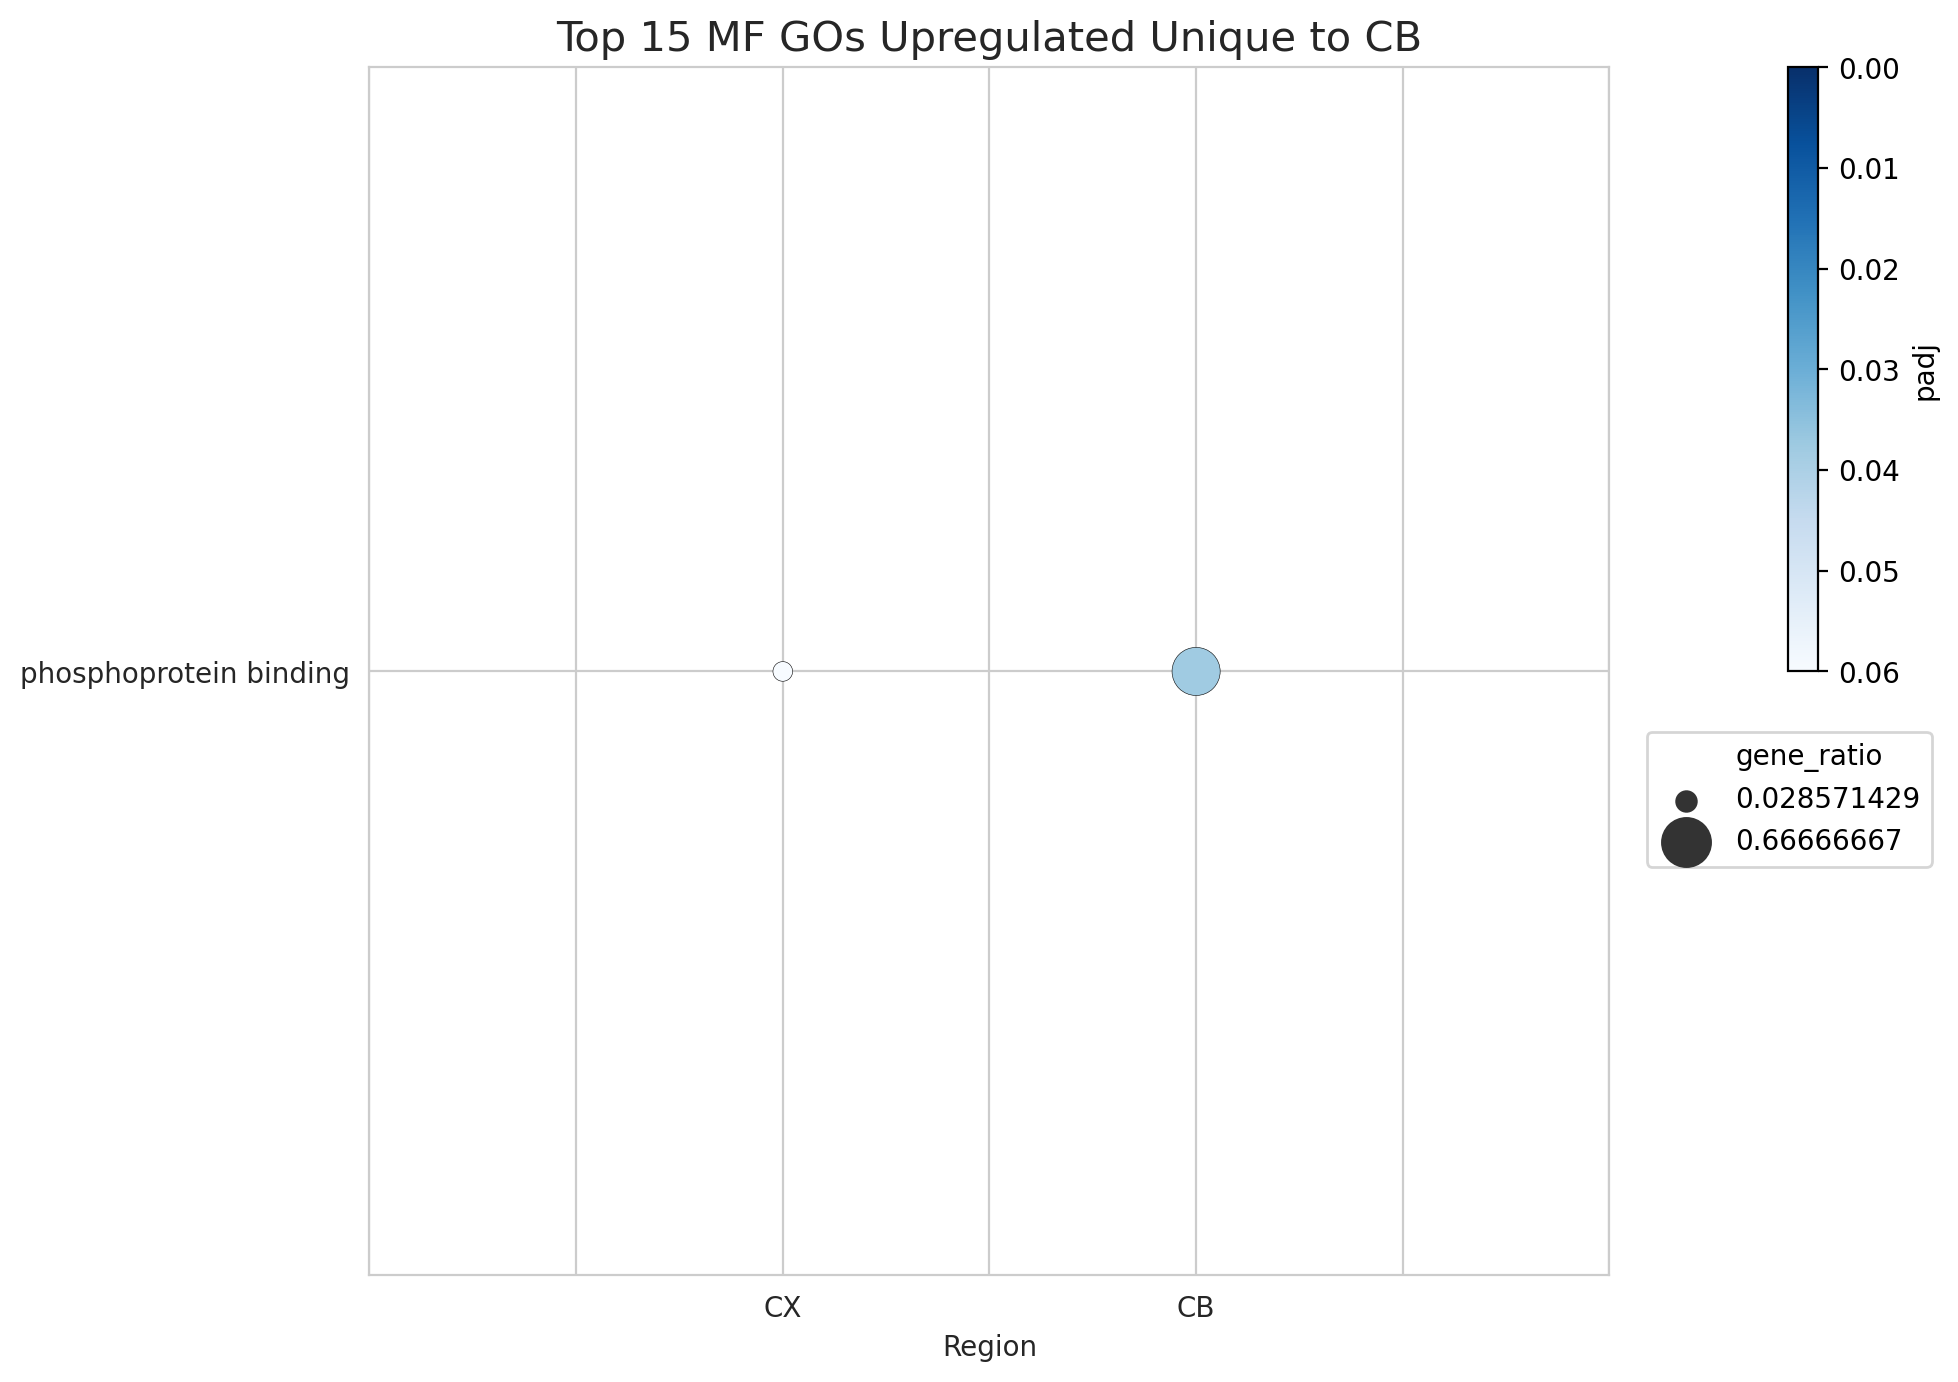

In [32]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=mf_unique_cb_long, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300), 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[3:7], l[3:7], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 MF GOs Upregulated Unique to CB", size=15)

plt.savefig('Top_15_MF_GOs_Up_Unique_CB_CX.pdf', bbox_inches='tight')

plt.show(ax)

In [ ]:
bp_shared[1:16].to_csv("bp_shared_up_long.csv")

In [4]:
bp_shared_long = pd.read_csv("bp_shared_up_long.csv")

/var/folders/4w/6x4glmd95f97_1j94ktzprrm0000gn/T/ipykernel_56820/3543763813.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])


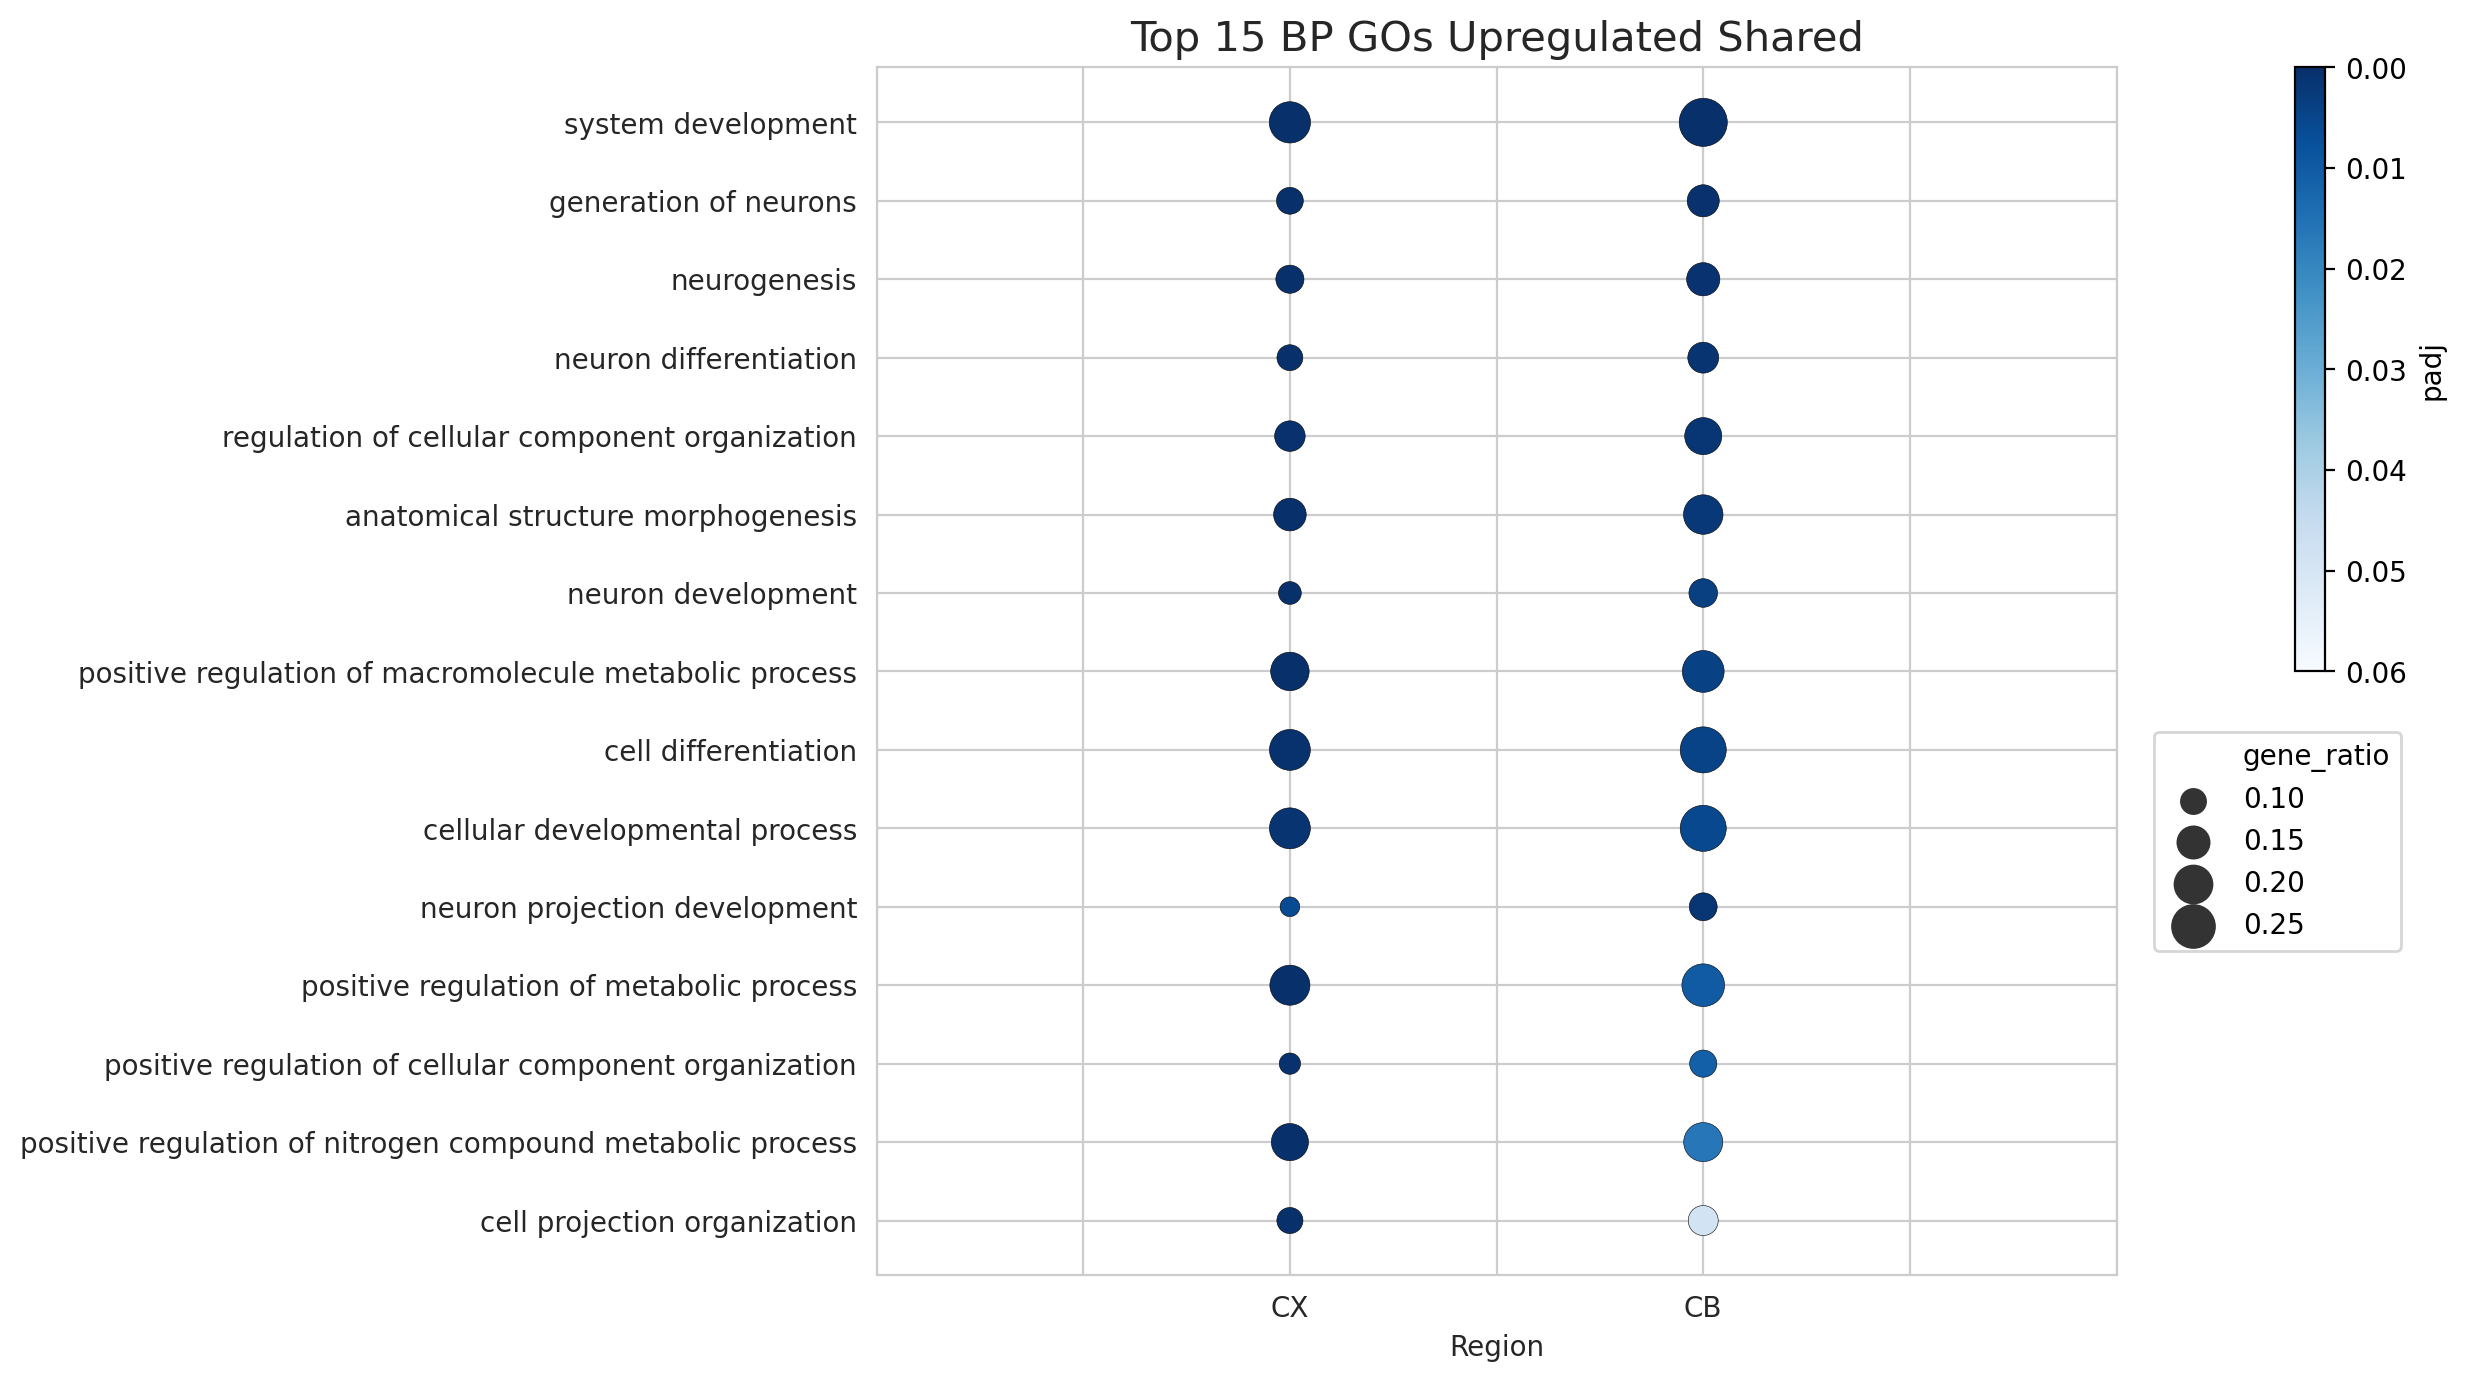

In [5]:
plt.figure(figsize=(10, 8), dpi=200)

norm = colors.Normalize(vmin=0, vmax=0.06)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=bp_shared_long, 
                         x="region", 
                         y="term_name", 
                         hue="adjusted_p_value", 
                         size="gene_ratio", 
                         sizes=(50, 300), 
                         palette="Blues_r", 
                         hue_norm=norm, 
                         edgecolor="black", 
                         linewidth=0.2)
    
sm = plt.cm.ScalarMappable(cmap="Blues_r", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
cbar = ax.figure.colorbar(sm, label="padj", shrink=0.5, anchor=(0.5, 1.0), orientation='vertical') 
cbar.ax.invert_yaxis()

ax.set(xlim=(0, 3), xlabel='Region', ylabel="")
ax.set_xticklabels(['', '', 'CX', '', 'CB', '', ''])

# Set legend position to be outside of graph
h,l = ax.get_legend_handles_labels()
plt.legend(h[5:10], l[5:10], bbox_to_anchor=(1.03, 0.45), loc='upper left', borderaxespad=0)

# Set title of graph
plt.title("Top 15 BP GOs Upregulated Shared", size=15)

plt.savefig('Top_15_BP_GOs_Up_Shared_CX_CB.pdf', bbox_inches='tight')

plt.show(ax)

In [23]:
mf_shared[1:16].to_csv("mf_shared_up_long.csv")